<a href="https://colab.research.google.com/github/Loopercool/Data-Detectives/blob/main/Swara_202311005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Results**

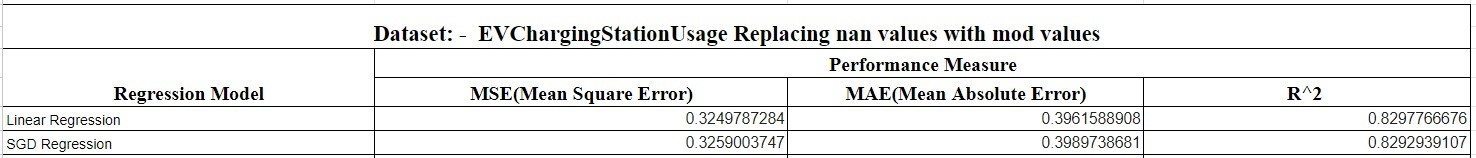

# **Import**

In [ ]:
import math
import numpy as np
import pandas as pd
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip /content/drive/MyDrive/Data_Mining/archive__1.zip -d /content/drive/MyDrive/Data_Mining/

unzip:  cannot find or open /content/drive/MyDrive/Data_Mining/archive__1.zip, /content/drive/MyDrive/Data_Mining/archive__1.zip.zip or /content/drive/MyDrive/Data_Mining/archive__1.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_main = pd.read_csv("/content/drive/MyDrive/EvCharge/EVChargingStationUsage.csv")

<ipython-input-3-7d89067552e3>:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv("/content/drive/MyDrive/EvCharge/EVChargingStationUsage.csv")


In [ ]:
columns_to_drop=['GHG Savings (kg)','Gasoline Savings (gallons)','Currency','Country','Org Name','Plug Type','Port Type','Port Number','User ID']
df_main.drop(columns=columns_to_drop, inplace=True)

# **Remove Entries having nan value**
When working with categorical or nominal data, removing NaN values using the mode is appropriate, especially when the number of missing values is minimal and the mode is a significant statistic for the relevant variable.

In [ ]:
for column in df_main.columns:
    mode_value = df_main[column].mode().iloc[0]  # Calculate mode for the column
    df_main[column].fillna(mode_value, inplace=True)

In [ ]:
data_cleaned = df_main

In [ ]:
data_cleaned.isnull().sum()

Station Name                       0
MAC Address                        0
Start Date                         0
Start Time Zone                    0
End Date                           0
End Time Zone                      0
Transaction Date (Pacific Time)    0
Total Duration (hh:mm:ss)          0
Charging Time (hh:mm:ss)           0
Energy (kWh)                       0
EVSE ID                            0
Address 1                          0
City                               0
State/Province                     0
Postal Code                        0
Latitude                           0
Longitude                          0
Fee                                0
Ended By                           0
Plug In Event Id                   0
Driver Postal Code                 0
County                             0
System S/N                         0
Model Number                       0
dtype: int64

In [ ]:
data_cleaned.shape

(259415, 24)

# **Converting *START DATE, Start time Zone* to numeric**
We modified the start date's format to match the format of the start time zone, which included both PDT and PST, and we modified the end date's format to match the format of the end time zone in a manner similar to the former. To do this, we first modified the format from PST to PDT before converting the start date and end date to a numerical representation and atlast we droped the start and end timezone.

In [ ]:
selected_columns = ["Start Date", "Start Time Zone"]

# Create a new DataFrame with the selected columns
dfa = data_cleaned[selected_columns]

In [ ]:
import pytz
from datetime import datetime

# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

# Function to convert date and time to numeric value
def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

# Convert PST to PDT and apply numeric conversion
converted_date_times = []
numeric_values = []

for index, row in dfa.iterrows():
    if row["Start Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["Start Date"])
    else:
        converted_dt = datetime.strptime(row["Start Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["Start Date"])
    numeric_values.append(numeric_value)

dfa["ConvertedDateTime"] = converted_date_times
dfa["NumericValue"] = numeric_values

print(dfa)

data_cleaned["Start Date"] = dfa["NumericValue"]

              Start Date Start Time Zone          ConvertedDateTime  \
0        7/29/2011 20:17             PDT        2011-07-29 20:17:00   
1         7/30/2011 0:00             PDT        2011-07-30 00:00:00   
2         7/30/2011 8:16             PDT        2011-07-30 08:16:00   
3        7/30/2011 14:51             PDT        2011-07-30 14:51:00   
4        7/30/2011 18:51             PDT        2011-07-30 18:51:00   
...                  ...             ...                        ...   
259410  12/31/2020 16:39             PST  2020-12-31 16:39:00-08:00   
259411  12/31/2020 16:48             PST  2020-12-31 16:48:00-08:00   
259412  12/31/2020 17:28             PST  2020-12-31 17:28:00-08:00   
259413  12/31/2020 17:49             PST  2020-12-31 17:49:00-08:00   
259414  12/31/2020 18:19             PST  2020-12-31 18:19:00-08:00   

        NumericValue  
0       1.311971e+09  
1       1.311984e+09  
2       1.312014e+09  
3       1.312037e+09  
4       1.312052e+09  
...      

<ipython-input-10-f029ae051f8b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["ConvertedDateTime"] = converted_date_times
<ipython-input-10-f029ae051f8b>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["NumericValue"] = numeric_values


In [ ]:
print("Original dataset:")
print(data_cleaned)

# Function to check if a value is a valid date and time format
def is_valid_datetime(value):
    try:
        datetime.strptime(value, '%m/%d/%Y %H:%M')
        return True
    except ValueError:
        return False

# Filter out rows with invalid date and time values
data_cleaned = data_cleaned[df_main['End Date'].apply(is_valid_datetime)]

# Print the dataset after dropping invalid rows
# print("\nDataset after dropping invalid rows:")
# print(df_main)

Original dataset:
                          Station Name          MAC Address    Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.311971e+09   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.311984e+09   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312014e+09   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312037e+09   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312052e+09   
...                                ...                  ...           ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  1.609433e+09   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609433e+09   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  1.609436e+09   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609437e+09   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  1.609439e+09   

       Start Time Zone          End Date End Time Zone  \

In [ ]:
selected_columns = ['End Date', 'End Time Zone']

# Create a new DataFrame with the selected columns
dfb = data_cleaned[selected_columns]

In [ ]:
import pytz
from datetime import datetime

# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

# Function to convert date and time to numeric value
def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

# Convert PST to PDT and apply numeric conversion
converted_date_times = []
numeric_values = []

for index, row in dfb.iterrows():
    if row["End Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["End Date"])
    else:
        converted_dt = datetime.strptime(row["End Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["End Date"])
    numeric_values.append(numeric_value)

dfb["ConvertedDateTime"] = converted_date_times
dfb["NumericValue"] = numeric_values

print(dfb)

data_cleaned["End Date"] = dfa["NumericValue"]

                End Date End Time Zone          ConvertedDateTime  \
0        7/29/2011 23:20           PDT        2011-07-29 23:20:00   
1         7/30/2011 0:02           PDT        2011-07-30 00:02:00   
2        7/30/2011 12:34           PDT        2011-07-30 12:34:00   
3        7/30/2011 16:55           PDT        2011-07-30 16:55:00   
4        7/30/2011 20:03           PDT        2011-07-30 20:03:00   
...                  ...           ...                        ...   
259410  12/31/2020 17:14           PST  2020-12-31 17:14:00-08:00   
259411  12/31/2020 20:31           PST  2020-12-31 20:31:00-08:00   
259412    1/1/2021 10:56           PST  2021-01-01 10:56:00-08:00   
259413  12/31/2020 21:55           PST  2020-12-31 21:55:00-08:00   
259414  12/31/2020 19:01           PST  2020-12-31 19:01:00-08:00   

        NumericValue  
0       1.311982e+09  
1       1.311984e+09  
2       1.312029e+09  
3       1.312045e+09  
4       1.312056e+09  
...              ...  
259410  1.

<ipython-input-13-75c889c56781>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["ConvertedDateTime"] = converted_date_times
<ipython-input-13-75c889c56781>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["NumericValue"] = numeric_values
<ipython-input-13-75c889c56781>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
data_cleaned.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'Start Time Zone',
       'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'Ended By', 'Plug In Event Id',
       'Driver Postal Code', 'County', 'System S/N', 'Model Number'],
      dtype='object')

In [ ]:
columns_to_drop=['Start Time Zone','End Time Zone','Transaction Date (Pacific Time)']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

<ipython-input-15-73ab62866251>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=columns_to_drop, inplace=True)


In [ ]:
def time_to_numeric(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_hours = hours + minutes / 60 + seconds / 3600
    return total_hours

data_cleaned['Total_time_hours'] = data_cleaned['Total Duration (hh:mm:ss)'].apply(time_to_numeric)

data_cleaned['Charging_time_hours'] = data_cleaned['Charging Time (hh:mm:ss)'].apply(time_to_numeric)

<ipython-input-16-26a9c2ee930d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Total_time_hours'] = data_cleaned['Total Duration (hh:mm:ss)'].apply(time_to_numeric)
<ipython-input-16-26a9c2ee930d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Charging_time_hours'] = data_cleaned['Charging Time (hh:mm:ss)'].apply(time_to_numeric)


In [ ]:
columns_to_drop=['Total Duration (hh:mm:ss)','Charging Time (hh:mm:ss)']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

<ipython-input-17-bbadedf6f900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=columns_to_drop, inplace=True)


In [ ]:
data_cleaned.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date', 'Energy (kWh)',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'Ended By', 'Plug In Event Id',
       'Driver Postal Code', 'County', 'System S/N', 'Model Number',
       'Total_time_hours', 'Charging_time_hours'],
      dtype='object')

In [ ]:
data_cleaned.head()

,Station Name,MAC Address,Start Date,End Date,Energy (kWh),EVSE ID,Address 1,City,State/Province,Postal Code,...,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,County,System S/N,Model Number,Total_time_hours,Charging_time_hours
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.311971e+09,1.311971e+09,6.249457,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,-122.160309,0.0,Plug Out at Vehicle,3,95124.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,3.058889,1.900833
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.311984e+09,1.311984e+09,0.106588,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,-122.160309,0.0,Customer,4,94301.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,0.035000,0.031667
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312014e+09,1.312014e+09,14.951777,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,-122.160309,0.0,Plug Out at Vehicle,5,94301.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,4.292222,4.291111
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312037e+09,1.312037e+09,7.159643,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,-122.160309,0.0,Customer,6,94302.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,2.056667,2.049444
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312052e+09,1.312052e+09,1.957765,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,-122.160309,0.0,Plug Out at Vehicle,7,94043.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,1.190000,0.731667


# **Label Encode categorical columns**
For our categorical columns, we opted for label encoding rather than one-hot encoding because it would have produced a dataset that was possibly high-dimensional and sparse and resulting in a considerable increase in the number of features. Particularly if the categorical variables had a significant number of distinct categories, this might have resulted in computing inefficiencies and memory problems. The dimensionality of the data is successfully reduced by label encoding, which on the other hand gives each category a distinct number label.

In [ ]:
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Station Name', 'MAC Address', 'Address 1', 'City', 'State/Province',
       'Ended By', 'County', 'Model Number'],
      dtype='object')


In [ ]:
categorical_columns = [col for col in categorical_columns if col != 'User ID']

In [ ]:
print(categorical_columns)

['Station Name', 'MAC Address', 'Address 1', 'City', 'State/Province', 'Ended By', 'County', 'Model Number']


In [ ]:
categorical_columns_1  = ['County', 'Model Number']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in categorical_columns:
  le = LabelEncoder()
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
  label_encoders[column] = le

print(data_cleaned)

<ipython-input-24-a404cdbf93ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
<ipython-input-24-a404cdbf93ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
<ipython-input-24-a404cdbf93ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

        Station Name  MAC Address    Start Date      End Date  Energy (kWh)  \
0                 12           25  1.311971e+09  1.311971e+09      6.249457   
1                 12           25  1.311984e+09  1.311984e+09      0.106588   
2                 12           25  1.312014e+09  1.312014e+09     14.951777   
3                 12           25  1.312037e+09  1.312037e+09      7.159643   
4                 12           25  1.312052e+09  1.312052e+09      1.957765   
...              ...          ...           ...           ...           ...   
259410            42           58  1.609433e+09  1.609433e+09      1.841000   
259411            44           44  1.609433e+09  1.609433e+09     12.744000   
259412            21           78  1.609436e+09  1.609436e+09     29.665000   
259413            44           44  1.609437e+09  1.609437e+09     11.976000   
259414            10           61  1.609439e+09  1.609439e+09      1.571000   

          EVSE ID  Address 1  City  State/Province 

In [ ]:
data_cleaned.drop(['City'],axis=1,inplace = True)
data_cleaned.drop(['State/Province'],axis=1,inplace=True)

<ipython-input-25-07a6f0543b04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(['City'],axis=1,inplace = True)
<ipython-input-25-07a6f0543b04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(['State/Province'],axis=1,inplace=True)


In [ ]:
data_cleaned.head()

,Station Name,MAC Address,Start Date,End Date,Energy (kWh),EVSE ID,Address 1,Postal Code,Latitude,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,County,System S/N,Model Number,Total_time_hours,Charging_time_hours
0,12,25,1.311971e+09,1.311971e+09,6.249457,109785.0,3,94301,37.444572,-122.160309,0.0,11,3,95124.0,1,1.427410e+11,6,3.058889,1.900833
1,12,25,1.311984e+09,1.311984e+09,0.106588,109785.0,3,94301,37.444572,-122.160309,0.0,1,4,94301.0,1,1.427410e+11,6,0.035000,0.031667
2,12,25,1.312014e+09,1.312014e+09,14.951777,109785.0,3,94301,37.444572,-122.160309,0.0,11,5,94301.0,1,1.427410e+11,6,4.292222,4.291111
3,12,25,1.312037e+09,1.312037e+09,7.159643,109785.0,3,94301,37.444572,-122.160309,0.0,1,6,94302.0,1,1.427410e+11,6,2.056667,2.049444
4,12,25,1.312052e+09,1.312052e+09,1.957765,109785.0,3,94301,37.444572,-122.160309,0.0,11,7,94043.0,1,1.427410e+11,6,1.190000,0.731667


# **Save CSV to google drive**

In [ ]:
path = '/content/drive/MyDrive/Data_Mining/data_cleaned.csv'

data_cleaned.to_csv(path,index=False)

OSError: ignored

In [ ]:
path = '/content/drive/MyDrive/Data_Mining/data_cleaned_energy_included.csv'

data_cleaned.to_csv(path,index=False)

In [ ]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned.csv')

# **Regression**
For regression analysis we imported various regression metrics, cross-validation, and regression models from scikit-learn library, including Linear Regression, Polynomial Features, Stochastic Gradient Descent Regressor, and RandomForest Regressor.

In [ ]:
data_df = data_cleaned.drop(['Charging_time_hours'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df, data_cleaned['Charging_time_hours'], random_state=42, test_size=0.20)

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((207500, 18), (51875, 18))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor

# **Linear Regression**
The dataset was chosen for linear regression because it is an appropriate method for understanding or forecasting a continuous target variable based on one or more independent factors. Because it presumes a linear relationship between the features and the target, it is simple to understand and put into practise. Additionally, linear regression can be used as a benchmark model for comparison with more advanced algorithms, enabling us to determine whether the dataset requires a more complex model.

We initially created a linear regression model to accomplish this. Then, we used this model—which was trained using scaled training data—to make predictions about the scaled test data. The linear regression model's coefficients and intercept were then established, and crucial regression metrics like mean squared error, mean absolute error, and R-squared were obtained. These measures were helpful for evaluating how well the linear regression model performed on the test dataset.

In [ ]:
model_linear_regression = LinearRegression()

model_linear_regression.fit(X_train_scaled, y_train)

predicted_values_linear_reg = model_linear_regression.predict(X_test_scaled)

print("Coefficients of liner regression:", model_linear_regression.coef_)
print("Intercept of liner regression:", model_linear_regression.intercept_)

linear_mse = mean_squared_error(y_test, predicted_values_linear_reg)
linear_mae = mean_absolute_error(y_test, predicted_values_linear_reg)
linear_r2 = r2_score(y_test, predicted_values_linear_reg)

print("Linear Regression MSE:", linear_mse)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression R-squared:", linear_r2)

Coefficients of liner regression: [ 3.95997652e-04 -2.58720033e-02 -2.87781236e-02 -2.87781236e-02
  9.68801232e-01  1.02144320e-02 -3.17552441e-02  4.38839024e-02
 -4.65803892e-02 -1.26174710e-01 -5.81671469e-02 -4.66975472e-02
 -8.65892375e-04  1.56028304e-02 -4.66564371e-03  1.20810190e-02
 -2.36826257e-02  4.38759889e-01]
Intercept of liner regression: 2.0013582476572096
Linear Regression MSE: 0.3249787283780379
Linear Regression MAE: 0.3961588908195571
Linear Regression R-squared: 0.8297766675862424


## **Cross Fold Validation**

In [ ]:
X = data_df
y = data_cleaned['Charging_time_hours']

size_scaler = preprocessing.StandardScaler().fit(X)
X_train_scaled_cross = size_scaler.transform(X)

In [ ]:
model = LinearRegression()

# Perform cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(model, X_train_scaled_cross, y, cv=10, scoring='neg_mean_squared_error')

# Convert the scores to positive values (MSE is negative by default)
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'mean_mse : {mean_mse}')
print(f'std_mse : {std_mse}')

mean_mse : 0.3264530626470866
std_mse : 0.09498973277648312


# **SGDRegression**
SGD regression is a quick and flexible learner, it is employed for datasets. It can handle enormous datasets without being overwhelmed, picks up new information rapidly, and can be tweaked to discover the optimum solutions. It can occasionally make slight errors and may require some assistance (hyperparameter adjustment) to function at its optimum, but it's an excellent option in many scenarios where efficiency counts.

We first set up the SGD regression model with specific hyperparameters, such as the maximum number of iterations, the learning rate, and a random seed for repeatability. We then went ahead and used the scaled training dataset to train the model, then we used the trained model to make predictions about the test data. The model's coefficients and intercept were then displayed, and the mean squared error, mean absolute error, and R-squared metrics were computed and recorded. Finally, we printed these derived metrics to evaluate how well the SGD regression model fit the test data and made predictions. This gave us important insights into the model's performance.

In [ ]:
model_sgdregression = SGDRegressor(max_iter=100000, learning_rate='constant', eta0=0.0001, random_state=42)

model_sgdregression.fit(X_train_scaled, y_train)

predicted_values_sgd_regression = model_sgdregression.predict(X_test_scaled)

print("Coefficients of sdg regression:", model_sgdregression.coef_)
print("Intercept of sdg regression:", model_sgdregression.intercept_)

sgd_mse = mean_squared_error(y_test, predicted_values_sgd_regression)
sgd_mae = mean_absolute_error(y_test, predicted_values_sgd_regression)
sgd_r2 = r2_score(y_test, predicted_values_sgd_regression)

print("SGD Regression MSE:", sgd_mse)
print("SGD Regression MAE:", sgd_mae)
print("SGD Regression R-squared:", sgd_r2)

Coefficients of sdg regression: [ 0.00636392 -0.02235558 -0.02697165 -0.02697165  0.98369601  0.00712283
 -0.03798185  0.04631678 -0.04950326 -0.12494172 -0.04839789 -0.04473848
 -0.0012065   0.01905981 -0.00276364  0.00863488 -0.02252972  0.43085696]
Intercept of sdg regression: [2.00291988]
SGD Regression MSE: 0.3259003746849693
SGD Regression MAE: 0.3989738680847213
SGD Regression R-squared: 0.8292939107410306


## **Cross fold validation**

In [ ]:
model_sgdregression = SGDRegressor(max_iter=100000, learning_rate='constant', eta0=0.0001, random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(model_sgdregression, X_train_scaled_cross, y, cv=20, scoring='neg_mean_squared_error')

# Convert the scores to positive values (MSE is negative by default)
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'mean_mse : {mean_mse}')
print(f'std_mse : {std_mse}')

mean_mse : 0.32571323550840936
std_mse : 0.10413003150026094
